# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [118]:
# TODO: Load the three CSV files into dataframes
# provider_df = pd.read_csv(...)
# facility_df = pd.read_csv(...)
# encounter_df = pd.read_csv(...)
provider_df = pd.read_csv('data/provider_data.csv')
facility_df = pd.read_csv('data/facility_data.csv')
encounter_df = pd.read_csv('data/encounter_data.csv')

# TODO: Print the shapes of each dataframe
# print("Provider data shape:", ...)
# print("Facility data shape:", ...)
# print("Encounter data shape:", ...)
print("Provider data shape:", provider_df.shape)
print("Facility data shape:", facility_df.shape)
print("Encounter data shape:", encounter_df.shape)

# TODO: Merge the dataframes for analysis
# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'
# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed
merged_df = pd.merge(encounter_df, provider_df, on='provider_id')
display(merged_df.head())

merged_df = merged_df.drop(columns=['facility_id_y'])
merged_df = merged_df.rename(columns={'facility_id_x': 'facility_id'})

display(merged_df.head())

merged_df = pd.merge(merged_df, facility_df, on='facility_id')

pd.set_option('display.max_columns', None)
display(merged_df.head())

merged_df = merged_df.drop(columns=['region_y'])
merged_df = merged_df.rename(columns={'region_x': 'region'})

display(merged_df.head())

# TODO: Print the merged dataframe shape, columns, and first few rows
# print("\nMerged data shape:", ...)
# print("\nColumns:", ...)
# print("\nFirst few rows:")
# print(...)
print("\nMerged data shape:", merged_df.shape)
print("\nColumns:", merged_df.columns.tolist())
print("\nFirst few rows:")
print(merged_df.head())


Provider data shape: (500, 7)
Facility data shape: (10, 6)
Encounter data shape: (5000, 12)


,encounter_id,patient_id,provider_id,facility_id_x,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,patient_paid,region,provider_name,provider_type,facility_id_y,specialty,years_experience,license_number
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,54.70,West,Quinn Anderson,Nurse,FAC005,Pediatrics,11,LIC000259
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,67.97,South,Drew Martinez,Therapist,FAC005,Endocrinology,19,LIC000258
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,33.17,South,Jordan Anderson,Physician,FAC008,Dermatology,3,LIC000213
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,269.77,West,Taylor Rodriguez,Nurse Practitioner,FAC003,Oncology,6,LIC000146
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,165.01,South,Drew Anderson,Physician Assistant,FAC009,Endocrinology,36,LIC000354


,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,patient_paid,region,provider_name,provider_type,specialty,years_experience,license_number
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,54.70,West,Quinn Anderson,Nurse,Pediatrics,11,LIC000259
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,67.97,South,Drew Martinez,Therapist,Endocrinology,19,LIC000258
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,33.17,South,Jordan Anderson,Physician,Dermatology,3,LIC000213
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,269.77,West,Taylor Rodriguez,Nurse Practitioner,Oncology,6,LIC000146
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,165.01,South,Drew Anderson,Physician Assistant,Endocrinology,36,LIC000354


,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,patient_paid,region_x,provider_name,provider_type,specialty,years_experience,license_number,facility_name,facility_type,region_y,beds,established_date
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,54.70,West,Quinn Anderson,Nurse,Pediatrics,11,LIC000259,Northside Urgent Care,Urgent Care,West,313,1994-10-04
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,67.97,South,Drew Martinez,Therapist,Endocrinology,19,LIC000258,City General Hospital,Urgent Care,South,276,1999-11-27
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,33.17,South,Jordan Anderson,Physician,Dermatology,3,LIC000213,City General Hospital,Urgent Care,South,276,1999-11-27
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,269.77,West,Taylor Rodriguez,Nurse Practitioner,Oncology,6,LIC000146,Northside Urgent Care,Urgent Care,West,313,1994-10-04
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,165.01,South,Drew Anderson,Physician Assistant,Endocrinology,36,LIC000354,Regional Medical Center,Urgent Care,South,459,1982-05-10


,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,patient_paid,region,provider_name,provider_type,specialty,years_experience,license_number,facility_name,facility_type,beds,established_date
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,54.70,West,Quinn Anderson,Nurse,Pediatrics,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,67.97,South,Drew Martinez,Therapist,Endocrinology,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,33.17,South,Jordan Anderson,Physician,Dermatology,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,269.77,West,Taylor Rodriguez,Nurse Practitioner,Oncology,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,165.01,South,Drew Anderson,Physician Assistant,Endocrinology,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10



Merged data shape: (5000, 21)

Columns: ['encounter_id', 'patient_id', 'provider_id', 'facility_id', 'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code', 'service_charge', 'insurance_paid', 'patient_paid', 'region', 'provider_name', 'provider_type', 'specialty', 'years_experience', 'license_number', 'facility_name', 'facility_type', 'beds', 'established_date']

First few rows:
  encounter_id patient_id provider_id facility_id encounter_date  \
0     ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1     ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2     ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3     ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4     ENC00005   PAT01388      PR0354      FAC003     2023-06-14   

         encounter_type diagnosis_code  procedure_code  service_charge  \
0          Office Visit          M79.3           99213          345.03   
1             Inpatient          N18.9     

### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [119]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
# TODO: Calculate mean, sum, count for years_experience by facility
# TODO: Calculate total encounter charges by facility
# TODO: Calculate total insurance payments by facility
# TODO: Find the facility with highest total encounter charges
merged_df.groupby('facility_name').agg(
    years_of_experience_mean=('years_experience', 'mean'),
    years_of_experience_sum=('years_experience', 'sum'),
    years_of_experience_count=('years_experience', 'count'),
    total_encounter_charges=('service_charge', 'sum'),
    total_insurance_payments=('insurance_paid', 'sum')
).reset_index()

# Pediatric Care Center has the highest total encounter charges.

# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid
# TODO: Save the summary dataframe as 'output/q1_groupby_analysis.csv'
summary_df = merged_df.groupby('facility_name').agg(
    total_providers=('provider_id', 'nunique'),
    avg_years_experience=('years_experience', 'mean'),
    total_service_charge=('service_charge', 'sum'),
    total_insurance_paid=('insurance_paid', 'sum')
).reset_index()
summary_df_rounded = summary_df.copy()
summary_df_rounded = summary_df_rounded.round(2)

summary_df_rounded.to_csv('output/q1_groupby_analysis.csv', index=False)

display(summary_df_rounded.head())


,facility_name,total_providers,avg_years_experience,total_service_charge,total_insurance_paid
0,Cardiology Specialty Center,297,19.32,276658.83,222139.04
1,City General Hospital,312,19.56,295508.13,236798.50
2,Community Health Clinic,328,20.16,334992.21,269207.92
3,Emergency Medical Center,299,19.67,310735.25,248439.20
4,Northside Urgent Care,305,20.14,297283.06,236839.71


### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [120]:
# TODO: Add facility mean years_experience as new column
# TODO: Add facility standard deviation of years_experience
# TODO: Create normalized years_experience (z-score within facility)
# TODO: Add facility total encounter charges as new column
summary_df['mean_years_experience'] = merged_df.groupby('facility_name')['years_experience'].transform('mean')
summary_df['std_years_experience'] = merged_df.groupby('facility_name')['years_experience'].transform('std')
summary_df['normalized_years_experience'] = (
    (merged_df['years_experience'] - summary_df['mean_years_experience']) /
    summary_df['std_years_experience']
)
summary_df['facility_total_encounter_charges'] = merged_df.groupby('facility_name')['service_charge'].transform('sum')

# TODO: Display the enhanced dataframe
# TODO: Save results as 'output/q1_aggregation_report.txt'
display(summary_df.head())
with open('output/q1_aggregation_report.txt', 'w') as f:
    f.write("Assignment 8 — Question 1: Aggregation report\n\n")
    f.write(summary_df.to_string(index=False))
    f.write('\n')
    

,facility_name,total_providers,avg_years_experience,total_service_charge,total_insurance_paid,mean_years_experience,std_years_experience,normalized_years_experience,facility_total_encounter_charges
0,Cardiology Specialty Center,297,19.319728,276658.83,222139.04,20.137014,10.581439,-0.863495,297283.06
1,City General Hospital,312,19.563008,295508.13,236798.50,19.563008,10.702137,-0.052607,295508.13
2,Community Health Clinic,328,20.160784,334992.21,269207.92,19.563008,10.702137,-1.547636,295508.13
3,Emergency Medical Center,299,19.668687,310735.25,248439.20,20.137014,10.581439,-1.336020,297283.06
4,Northside Urgent Care,305,20.137014,297283.06,236839.71,20.209205,11.575935,1.364105,316284.98


## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [121]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)
# TODO: Filter facilities with average years_experience > 10 (experienced staff)
# TODO: Filter facilities with total encounter charges > 250000 (high volume)
merged_df_filtered = merged_df.groupby('facility_name').filter(
    lambda x: (x['provider_id'].nunique() > 20)
)

merged_df_filtered_2 = merged_df.groupby('facility_name').filter(
    lambda x: (x['years_experience'].mean() > 10)
)

merged_df_filtered_3 = merged_df.groupby('facility_name').filter(
    lambda x: (x['service_charge'].sum() > 250000)
)

display(merged_df)
display(merged_df_filtered)
display(merged_df_filtered_2)
display(merged_df_filtered_3)

# All facilities fulfill the filter criteria

# TODO: Create a summary of filtered results
# TODO: Save results as 'output/q2_filter_analysis.csv'
q2_filter_analysis_summary = merged_df.groupby('facility_name').agg(
    provider_count=('provider_id', 'nunique'),
    avg_years_experience=('years_experience', 'mean'),
    total_service_charge=('service_charge', 'sum')
).reset_index()
display(q2_filter_analysis_summary.head())
q2_filter_analysis_summary.to_csv('output/q2_filter_analysis.csv', index=False)


,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,patient_paid,region,provider_name,provider_type,specialty,years_experience,license_number,facility_name,facility_type,beds,established_date
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,54.70,West,Quinn Anderson,Nurse,Pediatrics,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,67.97,South,Drew Martinez,Therapist,Endocrinology,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,33.17,South,Jordan Anderson,Physician,Dermatology,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,269.77,West,Taylor Rodriguez,Nurse Practitioner,Oncology,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,165.01,South,Drew Anderson,Physician Assistant,Endocrinology,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,1132.85,North,Jamie Martinez,Physician,Radiology,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,41.75,West,Sam Anderson,Nurse Practitioner,Radiology,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,79.81,South,Alex Williams,Nurse Practitioner,Primary Care,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,46.28,South,Taylor Wilson,Physician,Dermatology,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19


,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,patient_paid,region,provider_name,provider_type,specialty,years_experience,license_number,facility_name,facility_type,beds,established_date
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,54.70,West,Quinn Anderson,Nurse,Pediatrics,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,67.97,South,Drew Martinez,Therapist,Endocrinology,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,33.17,South,Jordan Anderson,Physician,Dermatology,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,269.77,West,Taylor Rodriguez,Nurse Practitioner,Oncology,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,165.01,South,Drew Anderson,Physician Assistant,Endocrinology,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,1132.85,North,Jamie Martinez,Physician,Radiology,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,41.75,West,Sam Anderson,Nurse Practitioner,Radiology,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,79.81,South,Alex Williams,Nurse Practitioner,Primary Care,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,46.28,South,Taylor Wilson,Physician,Dermatology,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19


,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,patient_paid,region,provider_name,provider_type,specialty,years_experience,license_number,facility_name,facility_type,beds,established_date
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,54.70,West,Quinn Anderson,Nurse,Pediatrics,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,67.97,South,Drew Martinez,Therapist,Endocrinology,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,33.17,South,Jordan Anderson,Physician,Dermatology,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,269.77,West,Taylor Rodriguez,Nurse Practitioner,Oncology,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,165.01,South,Drew Anderson,Physician Assistant,Endocrinology,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,1132.85,North,Jamie Martinez,Physician,Radiology,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,41.75,West,Sam Anderson,Nurse Practitioner,Radiology,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,79.81,South,Alex Williams,Nurse Practitioner,Primary Care,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,46.28,South,Taylor Wilson,Physician,Dermatology,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19


,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,patient_paid,region,provider_name,provider_type,specialty,years_experience,license_number,facility_name,facility_type,beds,established_date
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,54.70,West,Quinn Anderson,Nurse,Pediatrics,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,67.97,South,Drew Martinez,Therapist,Endocrinology,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,33.17,South,Jordan Anderson,Physician,Dermatology,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,269.77,West,Taylor Rodriguez,Nurse Practitioner,Oncology,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,165.01,South,Drew Anderson,Physician Assistant,Endocrinology,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,1132.85,North,Jamie Martinez,Physician,Radiology,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,41.75,West,Sam Anderson,Nurse Practitioner,Radiology,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,79.81,South,Alex Williams,Nurse Practitioner,Primary Care,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,46.28,South,Taylor Wilson,Physician,Dermatology,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19


,facility_name,provider_count,avg_years_experience,total_service_charge
0,Cardiology Specialty Center,297,19.319728,276658.83
1,City General Hospital,312,19.563008,295508.13
2,Community Health Clinic,328,20.160784,334992.21
3,Emergency Medical Center,299,19.668687,310735.25
4,Northside Urgent Care,305,20.137014,297283.06


### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

In [122]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    # TODO: Return mean, std, min, max, range for years_experience
    return pd.Series({
        'years_experience_mean': group['years_experience'].mean(),
        'years_experience_std': group['years_experience'].std(),
        'years_experience_min': group['years_experience'].min(),
        'years_experience_max': group['years_experience'].max(),
        'years_experience_range': group['years_experience'].max() - group['years_experience'].min()
    })

# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = merged_df.groupby('facility_name').apply(provider_stats, include_groups=False)

# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty
    counts = (
        group.groupby('provider_id')['encounter_id']
        .nunique()                     
        .rename('encounter_count')
        .reset_index()
    )
    provider_info = group[['provider_id', 'provider_name', 'years_experience', 'specialty']].drop_duplicates('provider_id')
    return provider_info.merge(counts, on='provider_id').nlargest(n, 'encounter_count')

# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = merged_df.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column

# TODO: Save results as 'output/q2_performance_report.txt'

display(top_providers_by_facility.head())
display(facility_provider_stats.head())

with open("output/q2_performance_report.txt", "w") as f:
    f.write("Assignment 8 — Question 2: Performance report\n\n")
    f.write("=== Top Providers by Facility ===\n\n")
    f.write(top_providers_by_facility.to_string(index=False))
    f.write("\n\n=== Provider Experience Statistics by Facility ===\n\n")
    f.write(facility_provider_stats.to_string())


/tmp/ipykernel_34958/546885756.py:36: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = merged_df.groupby('facility_name').apply(


,facility_name,provider_id,provider_name,years_experience,specialty,encounter_count
5,Cardiology Specialty Center,PR0391,Jordan Anderson,32,Neurology,4
44,Cardiology Specialty Center,PR0337,Riley Martinez,14,Endocrinology,4
75,City General Hospital,PR0173,Riley Davis,21,Dermatology,5
183,City General Hospital,PR0079,Taylor Davis,25,Psychiatry,5
33,Community Health Clinic,PR0236,Drew Jones,34,Endocrinology,6


,years_experience_mean,years_experience_std,years_experience_min,years_experience_max,years_experience_range
facility_name,,,,,
Cardiology Specialty Center,19.319728,10.484612,1.0,39.0,38.0
City General Hospital,19.563008,10.702137,1.0,39.0,38.0
Community Health Clinic,20.160784,11.044011,1.0,39.0,38.0
Emergency Medical Center,19.668687,11.023867,1.0,39.0,38.0
Northside Urgent Care,20.137014,10.581439,1.0,39.0,38.0


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [123]:
# TODO: Group by facility type and region
# TODO: Calculate statistics for each facility_type-region combination
# TODO: Use unstack to convert to wide format
# TODO: Use stack to convert back to long format
# 1) Build the hierarchical summary (MultiIndex rows, 2 value columns)
hierarchical = (
    merged_df
    .groupby(['facility_type', 'region'])
    .agg(
        avg_years_experience=('years_experience', 'mean'),
        total_service_charge=('service_charge', 'sum')
    )
)
print(hierarchical.head())

wide_format = hierarchical.unstack(level='region')
print("\nWide format:")
print(wide_format.head())

long_format = wide_format.stack(level='region')
print("\nLong format:")
print(long_format.head())

# TODO: Analyze the hierarchical structure
# For example, you can analyze the mean values by facility type and region
hierarchical_analysis = (
    merged_df
    .groupby(['facility_type', 'region'])
    .agg(
        avg_years_experience=('years_experience', 'mean'),
        total_service_charge=('service_charge', 'mean'),
        total_providers=('provider_id', 'nunique')
    )
)

print(hierarchical_analysis.head())

# TODO: Save results as 'output/q2_hierarchical_analysis.csv'
hierarchical_analysis.to_csv('output/q2_hierarchical_analysis.csv')

                         avg_years_experience  total_service_charge
facility_type    region                                            
Hospital         South              19.381139             334927.30
Specialty Center South              19.742690             672546.29
                 West               19.737844             599974.54
Urgent Care      North              20.160784             334992.21
                 South              19.881443             611793.11

Wide format:
                 avg_years_experience                        \
region                          North      South       West   
facility_type                                                 
Hospital                          NaN  19.381139        NaN   
Specialty Center                  NaN  19.742690  19.737844   
Urgent Care                 20.160784  19.881443  20.476420   

                 total_service_charge                        
region                          North      South       West  
facilit

/tmp/ipykernel_34958/3744253482.py:20: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  long_format = wide_format.stack(level='region')


## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [124]:
# TODO: Create pivot table: encounter charges by procedure code and region
# TODO: Create pivot table with multiple aggregations (sum, mean, count)
# TODO: Add totals (margins) to pivot table
# TODO: Handle missing values with fill_value
pivot_table = pd.pivot_table(
    merged_df,
    values='service_charge',
    index='procedure_code',
    columns='region',
    aggfunc=['sum', 'mean', 'count'],
    fill_value=0,
    margins=True,
    margins_name='Total'
)
pivot_table = pivot_table.apply(pd.to_numeric, errors='coerce')

display(pivot_table)

column_types = pivot_table.dtypes
print(column_types)

# Tip: When saving a pivot table to CSV, the index (row labels) is preserved by default.
#      This is usually desired - when reading back, use index_col=0 to restore the index.
# TODO: Save results as 'output/q3_pivot_analysis.csv'
pivot_table.to_csv('output/q3_pivot_analysis.csv')


sum                                             mean  \
region              North       South        West       Total        North   
procedure_code                                                               
36415            12130.35    57836.97    48458.05   118425.37   466.551923   
70450            90236.85   375893.20   312204.53   778334.58  3222.744643   
70551            52844.83   234817.26   160891.32   448553.41  2935.823889   
72040            11463.33    81039.58    56599.39   149102.30   369.784839   
80053            14798.09    83849.78    58540.39   157188.26   284.578654   
85025             8946.57    48989.64    40769.13    98705.34   255.616286   
93000             6743.28    55873.35    45845.38   108462.01   354.909474   
99213            62143.42   327262.66   259242.79   648648.87   460.321630   
99214            71684.08   322532.05   240095.41   634311.54   465.481039   
99283             4001.41    31172.21    24520.39    59694.01   333.450833   
Total           334992.21  1619266.70  1247166.78  3201425.69   656.847471   

                                                      count                    
region                South         West        Total North South  West Total  
procedure_code                                                                 
36415            416.093309   425.070614   424.463692    26   139   114   279  
70450           2665.909220  2623.567479  2702.550625    28   141   119   288  
70551           2762.556000  2925.296727  2838.945633    18    85    55   158  
72040            471.160349   425.559323   443.756845    31   172   133   336  
80053            297.339645   269.771382   285.278149    52   282   217   551  
85025            312.035924   287.106549   295.524970    35   157   142   334  
93000            382.694178   440.820962   403.204498    19   146   104   269  
99213            498.116682   473.935631   484.427834   135   657   547  1339  
99214            489.426480   474.496858   480.903366   154   659   506  1319  
99283            465.256866   510.841458   470.031575    12    67    48   127  
Total            646.413852   628.295607   640.285138   510  2505  1985  5000

       region
sum    North     float64
       South     float64
       West      float64
       Total     float64
mean   North     float64
       South     float64
       West      float64
       Total     float64
count  North       int64
       South       int64
       West        int64
       Total       int64
dtype: object


### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [125]:
# TODO: Create crosstab of facility type vs region with counts
# TODO: Create crosstab with margins (row and column totals)
# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
crosstab = pd.crosstab(
    index=merged_df['facility_type'],
    columns=merged_df['region'],
    margins=True,
    margins_name='Total'
)
print(crosstab)

# TODO: Analyze the cross-tabulation results
# TODO: Save results as 'output/q3_crosstab_analysis.csv'
crosstab.to_csv('output/q3_crosstab_analysis.csv')

region            North  South  West  Total
facility_type                              
Hospital              0    509     0    509
Specialty Center      0   1026   946   1972
Urgent Care         510    970  1039   2519
Total               510   2505  1985   5000


### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

/tmp/ipykernel_34958/1879138964.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


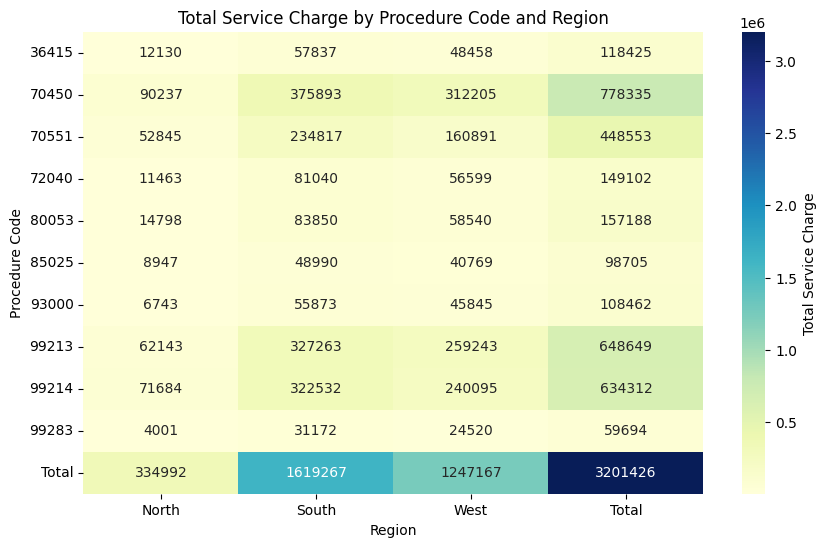

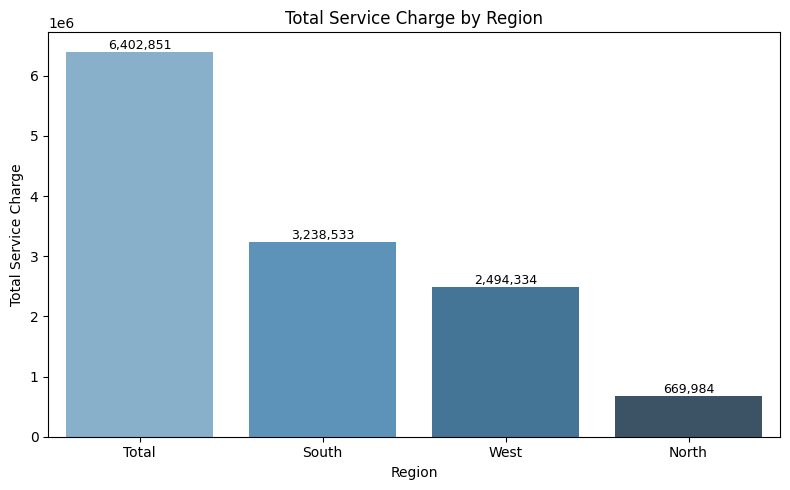

In [126]:
# TODO: Create heatmap from pivot table
# TODO: Create bar chart from pivot table
# TODO: Customize colors and styling
# TODO: Add appropriate titles and labels
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table['sum'],
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Total Service Charge'}
)
plt.title('Total Service Charge by Procedure Code and Region')
plt.xlabel('Region')
plt.ylabel('Procedure Code')

# --- BAR CHART: Total Service Charge by Region ---

# Collapse across procedure codes to get totals per region
region_totals = pivot_table['sum'].sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=region_totals.index,
    y=region_totals.values,
    palette="Blues_d"
)
plt.title('Total Service Charge by Region')
plt.xlabel('Region')
plt.ylabel('Total Service Charge')

# Annotate bars with values
for i, v in enumerate(region_totals.values):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)

# Save figure
plt.tight_layout()
plt.savefig('output/q3_pivot_barchart.png')

# TODO: Save the plot as 'output/q3_pivot_visualization.png'
plt.savefig('output/q3_pivot_visualization.png')

# SAVE VERSION FOR TEST (flattened columns)
pivot_table_for_csv = pivot_table.copy()
pivot_table_for_csv.columns = ['_'.join(map(str, col)).strip() for col in pivot_table_for_csv.columns.values]
pivot_table_for_csv = pivot_table_for_csv.apply(pd.to_numeric, errors='coerce')

pivot_table_for_csv.to_csv('output/q3_pivot_analysis.csv')

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques